# ES170 Final Project
Author: Abdulrahman Jamjoom

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from qiskit.tools.visualization import plot_histogram
from scipy.linalg import hadamard
from math import *
import Qconfig
import sys
from qiskit import QuantumProgram, QuantumCircuit
from qiskit.tools import visualization

# Quantum search of a real unstructred database

Creating a dynamic Uf gate for Grover's algorithm

Source: https://arxiv.org/pdf/1502.04943.pdf

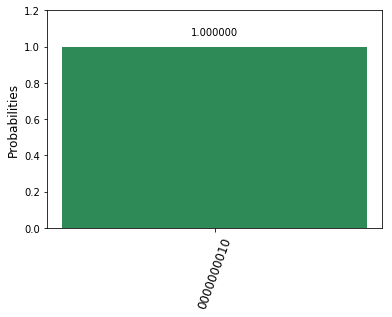

In [73]:
# Circuit for two bits

iterations = 3

qp_uf = QuantumProgram()
qp_uf.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

n = 10  # number of qubits
q = qp_uf.create_quantum_register("q", n) # quantum register
c = qp_uf.create_classical_register("c", n) # classical register

grove = qp_uf.create_circuit("grove", [q], [c])

#####################
# Init Qubits
#####################

grove.h(q[0]) # x_1
grove.h(q[1]) # x_2

grove.x(q[8]) 

# Set search phrase
# currently searching for 01
grove.x(q[4])

grove.x(q[6])
grove.h(q[6]) # hadamard last qubit

for i in range(iterations):
    #####################
    # Grover Iteration
    #####################

    #####################
    # Uw's Implementation
    #####################

    ##########
    # Memory
    ##########

    # Toffoli gates 1
    grove.x(q[0]) 
    grove.x(q[1])
    grove.ccx(q[0],q[1],q[2])
    grove.ccx(q[0],q[1],q[3])
    grove.x(q[0]) 
    grove.x(q[1])

    # Toffoli gates 2
    grove.x(q[1])
    grove.ccx(q[0],q[1],q[3])
    grove.x(q[1])

    # Toffoli gates 3
    grove.x(q[0])
    grove.ccx(q[0],q[1],q[2])
    grove.x(q[0])

    # Toffoli gates 4

    ##########
    # Oracle Function
    ##########

    # flipping control cubit every iteration of oracle function (to load twice for uncomputation for q[2], q[3])
    grove.cx(q[8], q[7])

    # cnot (comparing loaded data and search phrase)
    grove.cx(q[2],q[4])
    grove.cx(q[3],q[5])

    # negative controls
    grove.x(q[4])
    grove.x(q[5])

    # toffoli gate with 3 controls using ancila bits and uncomputation
    grove.ccx(q[4], q[5], q[9])
    grove.ccx(q[7], q[9], q[6])
    grove.ccx(q[4], q[5], q[9])

    # restore the negative controls
    grove.x(q[4])
    grove.x(q[5])

    # uncomputation of the search phrase
    grove.cx(q[2],q[4])
    grove.cx(q[3],q[5])

    ## END of Uw 

    ##########
    # Grover's diffusion operator
    ##########

    grove.h(q[0])
    grove.h(q[1])

    grove.x(q[0])
    grove.x(q[1])

    grove.cz(q[0], q[1])

    grove.x(q[0])
    grove.x(q[1])

    grove.h(q[0])
    grove.h(q[1])

#############
# Measurement
#############

grove.measure(q[0], c[0])
grove.measure(q[1], c[1])

#####################
# Execute & Results
#####################

backend = 'ibmqx_hpc_qasm_simulator'
#backend = 'ibmqx4'   
circuits = ['grove']  
shots = 1024           
max_credits = 3          
wait = 10   
timeout = 240 
result_real = qp_uf.execute(circuits, backend, shots=shots, max_credits=max_credits, wait=wait, timeout=timeout)
plot_histogram(result_real.get_counts('grove'))